In [6]:
# Setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import time
from skimage import io
from skimage import filters
from skimage.feature import corner_peaks
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We first smooth the input image by convolving it with a Gaussian kernel. The equation for a Gaussian kernel of size $(2k+1)\times(2k+1)$ is given by:

$$h_{ij}=\frac{1}{2\pi\sigma^2}\exp{\Bigl(-\frac{(i-k)^2+(j-k)^2}{2\sigma^2}\Bigr)}, 0\leq i,j < 2k+1$$

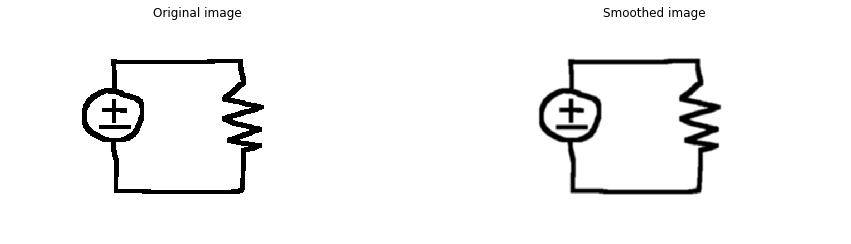

In [15]:
from cs347 import conv, gaussian_kernel

# Define 3x3 Gaussian kernel with std = 1
kernel = gaussian_kernel(3, 1)
kernel_test = np.array(
    [[ 0.05854983, 0.09653235, 0.05854983],
     [ 0.09653235, 0.15915494, 0.09653235],
     [ 0.05854983, 0.09653235, 0.05854983]]
)

# Test Gaussian kernel
if not np.allclose(kernel, kernel_test):
    print('Incorrect values! Please check your implementation.')

# Test with different kernel_size and sigma
kernel_size = 5
sigma = 1.4

# Load image
img = io.imread('circuit1.png', as_grey=True)

# Define 5x5 Gaussian kernel with std = sigma
kernel = gaussian_kernel(kernel_size, sigma)

# Convolve image with kernel to achieve smoothed effect
smoothed = conv(img, kernel)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(smoothed)
plt.title('Smoothed image')
plt.axis('off')

plt.show()

We compute intensity gradient of image using Sobel operators.

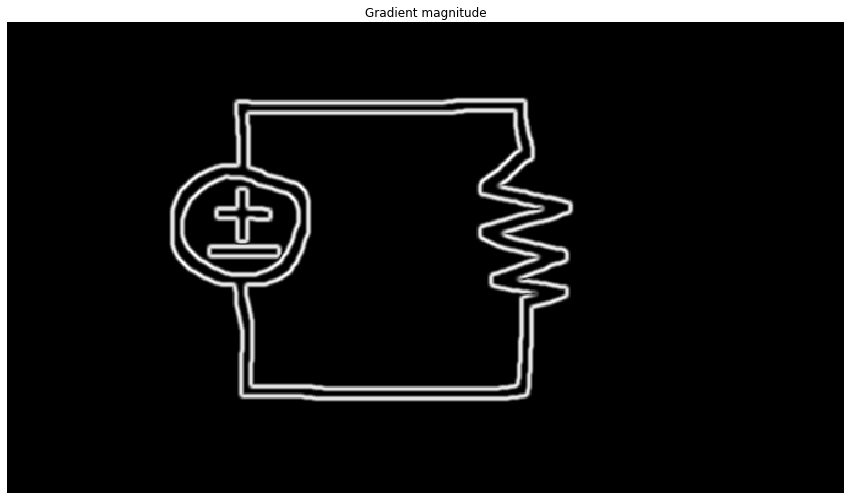

In [16]:
from cs347 import gradient

G, theta = gradient(smoothed)

if not np.all(G >= 0):
    print('Magnitude of gradients should be non-negative.')
    
if not np.all((theta >= 0) * (theta < 360)):
    print('Direction of gradients should be in range 0 <= theta < 360')

plt.imshow(G)
plt.title('Gradient magnitude')
plt.axis('off')
plt.show()

We apply non-maximum suppression

In [17]:
from cs347 import non_maximum_suppression

# Test input
g = np.array(
    [[0.4, 0.5, 0.6],
     [0.3, 0.5, 0.7],
     [0.4, 0.5, 0.6]]
)

# Print out non-maximum suppressed output
# varying theta
for angle in range(0, 180, 45):
    print('Thetas:', angle)
    t = np.ones((3, 3)) * angle # Initialize theta
    print(non_maximum_suppression(g, t))

Thetas: 0
[[0.  0.  0.6]
 [0.  0.  0.7]
 [0.  0.  0.6]]
Thetas: 45
[[0.  0.  0.6]
 [0.  0.  0.7]
 [0.4 0.5 0.6]]
Thetas: 90
[[0.4 0.5 0. ]
 [0.  0.5 0.7]
 [0.4 0.5 0. ]]
Thetas: 135
[[0.4 0.5 0.6]
 [0.  0.  0.7]
 [0.  0.  0.6]]


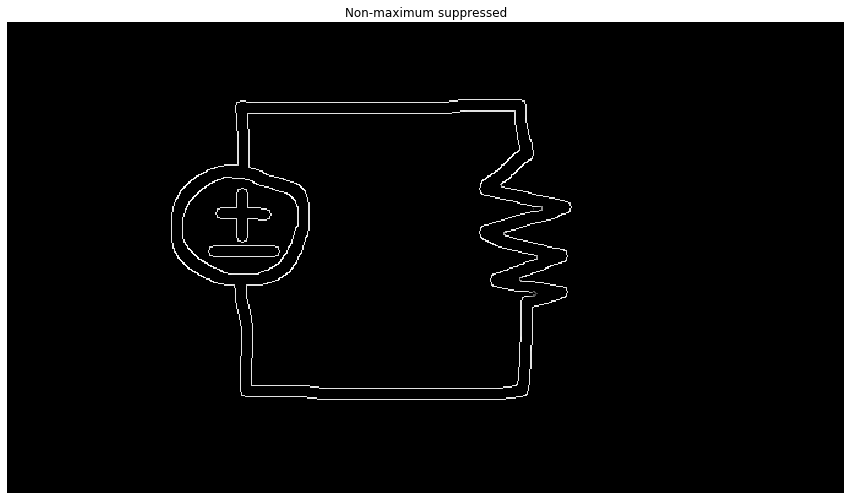

In [18]:
nms = non_maximum_suppression(G, theta)
plt.imshow(nms)
plt.title('Non-maximum suppressed')
plt.axis('off')
plt.show()

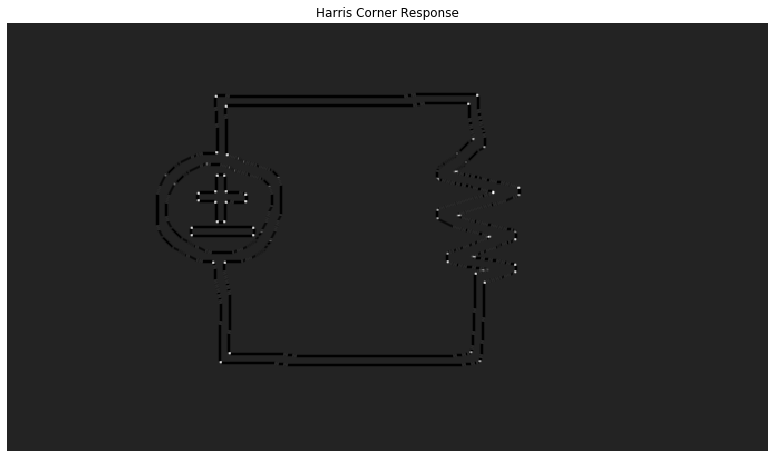

In [27]:
from cs347 import harris_corners

img = imread('circuit1.png', as_grey=True)

# Compute Harris corner response
response = harris_corners(img)

plt.figure(figsize=(30,30))

# Display corner response
plt.subplot(1,2,1)
plt.imshow(response)
plt.axis('off')
plt.title('Harris Corner Response')

plt.show()

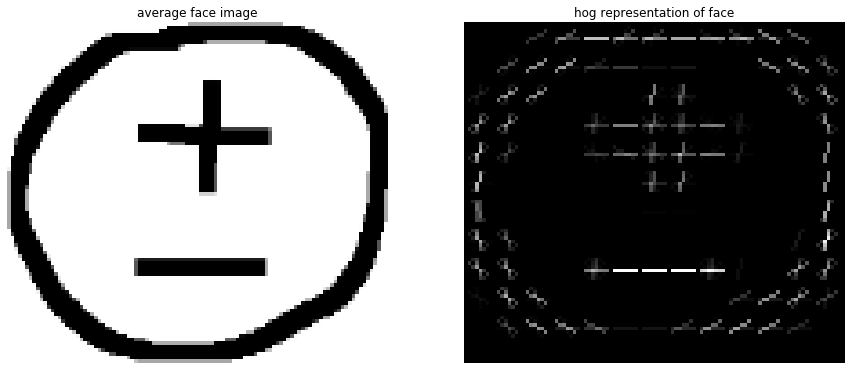

In [31]:
from cs347 import hog_feature, plot_part1

img = imread('voltagesource.png', as_grey=True)
img = rescale(img, 0.6)

face_shape = img.shape
(face_feature, hog_image) = hog_feature(img)

plot_part1(img, hog_image)

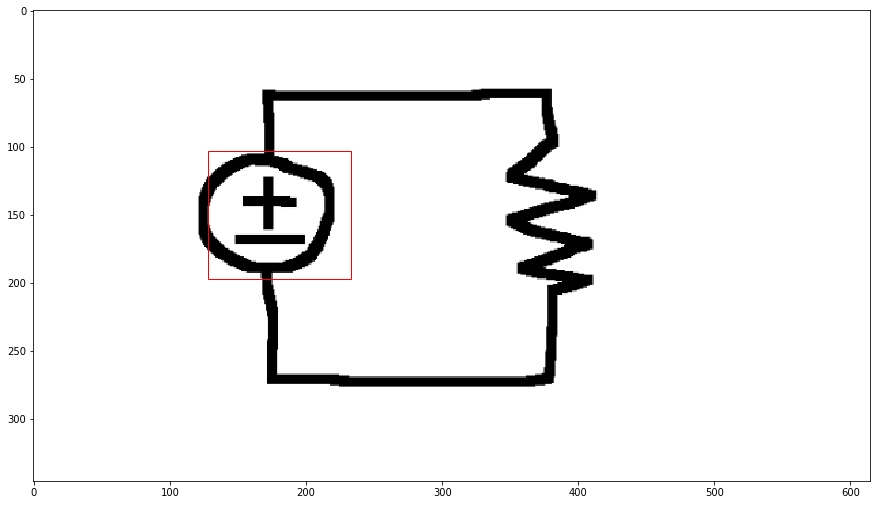

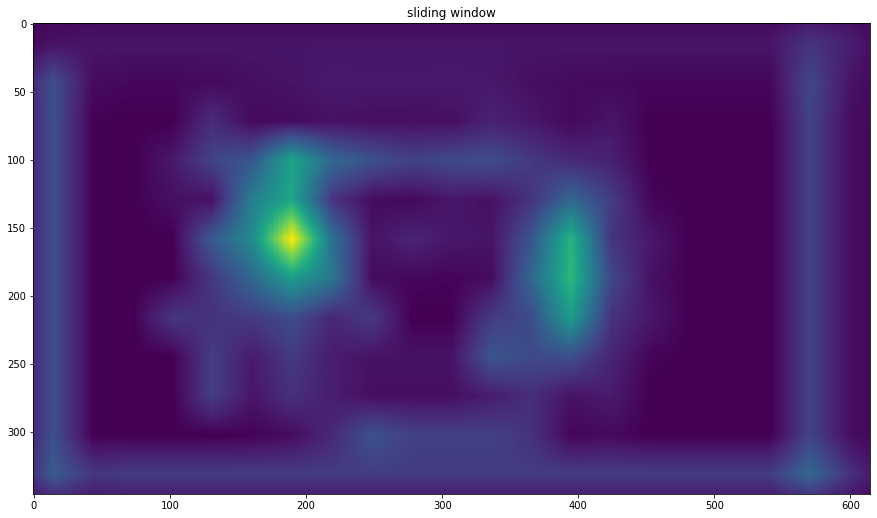

In [37]:
from cs347 import sliding_window, plot_part2

image_path = 'circuit1.png'

image = io.imread(image_path, as_grey=True)
image = rescale(image, 0.9)

(hogFeature, hogImage) = hog_feature(image)

(winH, winW) = face_shape
(score, r, c, response_map) = sliding_window(image, face_feature, stepSize=30, windowSize=face_shape)
crop = image[r:r+winH, c:c+winW]

plot_part2(image, r, c, response_map, winW, winH)

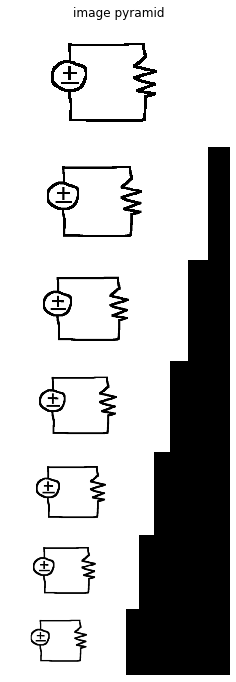

In [21]:
from cs347 import pyramid, plot_part3_1

image_path = 'circuit1.png'

image = io.imread(image_path, as_grey=True)

images = pyramid(image, scale = 0.9)

plot_part3_1(images)

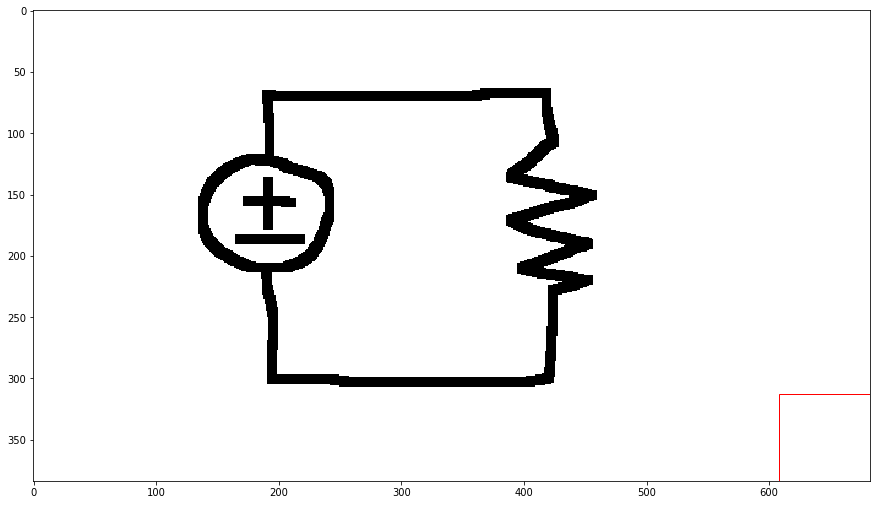

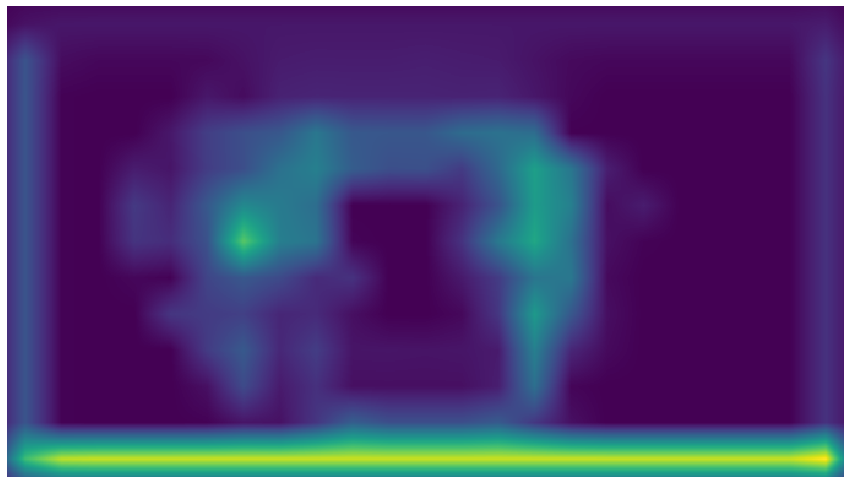

In [41]:
from cs347 import pyramid_score, plot_part3_2

image_path = 'circuit1.png'

image = io.imread(image_path, as_grey=True)

(winH, winW) = face_shape
max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
        (image, face_feature, face_shape, stepSize = 30, scale=0.8)

plot_part3_2(image, max_scale, winW, winH, maxc, maxr, max_response_map)